In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 500)
%matplotlib inline
plt.style.use('bmh')
import yfinance as yf

In [86]:
# class color:
#    PURPLE = '\033[95m'
#    CYAN = '\033[96m'
#    DARKCYAN = '\033[36m'
#    BLUE = '\033[94m'
#    GREEN = '\033[92m'
#    YELLOW = '\033[93m'
#    RED = '\033[91m'
#    BOLD = '\033[1m'
#    UNDERLINE = '\033[4m'
#    END = '\033[0m'

In [ ]:
import pandas as pd
import numpy as np
import os
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
%matplotlib inline
plt.style.use('bmh')

# <center>Data Extraction</center>

I am interested in analysing some of the stock data of big corporations. Curious to know how are they performing during this pandemic <br> (Facebook, Amazon, Google, Microsoft, twitter, Apple, Nvidia) <br> and top banks in Canada i.e. (RY,TD,BMO,BNS,CM) {RBC,TD,BMO,BNS,CM}

In [2]:
top_companies = ['FB','AMZN','GOOGL','MSFT','TWTR','AAPL','NVDA']
top_banks = ['RY','TD','BMO','BNS','CM']
companies = yf.download(top_companies,'2008-01-01','2020-04-01')
banks = yf.download(top_banks,'2008-01-01','2020-04-01')

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  5 of 5 completed


Data has been downloaded, now lets have a look at how our data looks like:

In [3]:
companies.head()

Adj Close                                                        \
                 AAPL       AMZN  FB       GOOGL       MSFT       NVDA TWTR   
Date                                                                          
2008-01-02  24.161295  96.250000 NaN  342.937927  26.523193  30.381723  NaN   
2008-01-03  24.172449  95.209999 NaN  343.007996  26.636166  30.142422  NaN   
2008-01-04  22.327251  88.790001 NaN  328.828827  25.890617  27.611382  NaN   
2008-01-07  22.028393  88.820000 NaN  324.949951  26.063828  24.758211  NaN   
2008-01-08  21.235991  87.879997 NaN  316.156158  25.190252  25.282822  NaN   

                Close                                                        \
                 AAPL       AMZN  FB       GOOGL       MSFT       NVDA TWTR   
Date                                                                          
2008-01-02  27.834286  96.250000 NaN  342.937927  35.220001  33.009998  NaN   
2008-01-03  27.847143  95.209999 NaN  343.007996  35.369999  32.750000  NaN   
2008-01-04  25.721428  88.790001 NaN  328.828827  34.380001  30.000000  NaN   
2008-01-07  25.377142  88.820000 NaN  324.949951  34.610001  26.900000  NaN   
2008-01-08  24.464285  87.879997 NaN  316.156158  33.450001  27.469999  NaN   

                 High                                                        \
                 AAPL       AMZN  FB       GOOGL       MSFT       NVDA TWTR   
Date                                                                          
2008-01-02  28.608572  97.430000 NaN  349.034027  35.959999  34.250000  NaN   
2008-01-03  28.198572  97.250000 NaN  343.768768  35.650002  33.860001  NaN   
2008-01-04  27.571428  93.400002 NaN  340.820831  35.200001  31.930000  NaN   
2008-01-07  26.228571  90.570000 NaN  331.471466  34.799999  30.450001  NaN   
2008-01-08  26.065714  91.830002 NaN  330.310303  34.709999  29.290001  NaN   

                  Low                                                        \
                 AAPL       AMZN  FB       GOOGL       MSFT       NVDA TWTR   
Date                                                                          
2008-01-02  27.507143  94.699997 NaN  339.204193  35.000000  32.560001  NaN   
2008-01-03  27.527143  94.519997 NaN  338.598602  34.860001  32.630001  NaN   
2008-01-04  25.555714  88.500000 NaN  327.827820  34.090000  29.799999  NaN   
2008-01-07  24.318571  85.470001 NaN  318.993988  34.250000  26.350000  NaN   
2008-01-08  24.400000  86.930000 NaN  315.815826  33.400002  26.420000  NaN   

                 Open                                                        \
                 AAPL       AMZN  FB       GOOGL       MSFT       NVDA TWTR   
Date                                                                          
2008-01-02  28.467142  95.349998 NaN  346.781769  35.790001  34.119999  NaN   
2008-01-03  27.915714  96.059998 NaN  342.972961  35.220001  33.200001  NaN   
2008-01-04  27.350000  93.260002 NaN  340.185181  35.189999  31.770000  NaN   
2008-01-07  25.892857  88.620003 NaN  327.297302  34.549999  30.200001  NaN   
2008-01-08  25.734285  87.550003 NaN  326.826813  34.709999  27.049999  NaN   

               Volume                                                   
                 AAPL      AMZN  FB     GOOGL      MSFT      NVDA TWTR  
Date                                                                    
2008-01-02  269794700  13858700 NaN   8605100  63004200  12099100  NaN  
2008-01-03  210516600   9122500 NaN   6498400  49599600  11882700  NaN  
2008-01-04  363958000  10270000 NaN  10708800  72090800  18402300  NaN  
2008-01-07  518048300   9981600 NaN  12793900  80164300  25170000  NaN  
2008-01-08  380954000  12283300 NaN  10667500  79148300  27673900  NaN

In [4]:
banks.head()

Adj Close                                                  Close  \
                  BMO        BNS         CM         RY         TD        BMO   
Date                                                                           
2008-01-02  28.801723  25.824650  32.697151  28.486523  15.603374  55.919998   
2008-01-03  29.193163  25.638714  32.490707  28.373882  15.553451  56.680000   
2008-01-04  28.436031  24.786497  31.196936  27.771269  15.199454  55.209999   
2008-01-07  28.724468  24.409462  31.586908  27.568518  14.836370  55.770000   
2008-01-08  28.394831  24.047913  30.531712  27.433344  14.682057  55.130001   

                                                             High             \
                  BNS         CM         RY         TD        BMO        BNS   
Date                                                                           
2008-01-02  50.000000  71.269997  50.580002  34.380001  57.070000  50.779999   
2008-01-03  49.639999  70.820000  50.380001  34.270000  56.980000  50.119999   
2008-01-04  47.990002  68.000000  49.310001  33.490002  56.650002  49.270000   
2008-01-07  47.259998  68.849998  48.950001  32.689999  56.040001  48.520000   
2008-01-08  46.560001  66.550003  48.709999  32.349998  56.810001  48.040001   

                                                   Low                        \
                   CM         RY         TD        BMO        BNS         CM   
Date                                                                           
2008-01-02  72.089996  51.360001  34.970001  55.790001  49.880001  70.760002   
2008-01-03  71.389999  50.919998  34.520000  55.639999  49.189999  70.080002   
2008-01-04  71.160004  50.139999  34.014999  54.959999  47.889999  67.849998   
2008-01-07  69.410004  49.750000  33.794998  54.889999  47.040001  66.839996   
2008-01-08  69.949997  49.930000  33.389999  55.130001  46.430000  66.190002   

                                       Open                                   \
                   RY         TD        BMO        BNS         CM         RY   
Date                                                                           
2008-01-02  50.279999  34.224998  57.020000  50.730000  71.620003  51.119999   
2008-01-03  49.910000  33.845001  56.009998  50.029999  71.389999  50.919998   
2008-01-04  49.200001  33.410000  56.650002  49.270000  70.550003  50.119999   
2008-01-07  48.619999  32.384998  55.709999  48.130001  69.230003  49.110001   
2008-01-08  48.669998  32.305000  56.410000  47.650002  69.949997  49.060001   

                       Volume                                   
                   TD     BMO     BNS      CM      RY       TD  
Date                                                            
2008-01-02  34.965000  222200  213600  299000  486300  1784600  
2008-01-03  34.450001  203100  158400  149900  590300  1763600  
2008-01-04  33.985001  200800  190100  302600  712800  2030800  
2008-01-07  33.299999  401200  312600  374800  992600  9169600  
2008-01-08  32.814999  266700  253500  371800  961000  5282200

It can be seen from the data that it has multi-index columns. You can work with the existing data but I'd like to clean it up a little bit

In [5]:
companies.columns = ['_'.join(col) for col in companies.columns]
banks.columns = ['_'.join(col) for col in banks.columns]
print(companies.columns)
print(banks.columns)

Index(['Adj Close_AAPL', 'Adj Close_AMZN', 'Adj Close_FB', 'Adj Close_GOOGL',
       'Adj Close_MSFT', 'Adj Close_NVDA', 'Adj Close_TWTR', 'Close_AAPL',
       'Close_AMZN', 'Close_FB', 'Close_GOOGL', 'Close_MSFT', 'Close_NVDA',
       'Close_TWTR', 'High_AAPL', 'High_AMZN', 'High_FB', 'High_GOOGL',
       'High_MSFT', 'High_NVDA', 'High_TWTR', 'Low_AAPL', 'Low_AMZN', 'Low_FB',
       'Low_GOOGL', 'Low_MSFT', 'Low_NVDA', 'Low_TWTR', 'Open_AAPL',
       'Open_AMZN', 'Open_FB', 'Open_GOOGL', 'Open_MSFT', 'Open_NVDA',
       'Open_TWTR', 'Volume_AAPL', 'Volume_AMZN', 'Volume_FB', 'Volume_GOOGL',
       'Volume_MSFT', 'Volume_NVDA', 'Volume_TWTR'],
      dtype='object')
Index(['Adj Close_BMO', 'Adj Close_BNS', 'Adj Close_CM', 'Adj Close_RY',
       'Adj Close_TD', 'Close_BMO', 'Close_BNS', 'Close_CM', 'Close_RY',
       'Close_TD', 'High_BMO', 'High_BNS', 'High_CM', 'High_RY', 'High_TD',
       'Low_BMO', 'Low_BNS', 'Low_CM', 'Low_RY', 'Low_TD', 'Open_BMO',
       'Open_BNS', 'Open_CM', 'O

Rearranging the column names so as to keep them in order:

In [6]:
l = []
for i in top_companies:
    print(i)
    col=[col for col in companies.columns if i in col]
    l.extend(col)
companies.columns = l
companies = companies.reset_index()
print(companies.columns)

M = []
for i in top_banks:
    print(i)
    kol=[kol for kol in banks.columns if i in kol]
    M.extend(kol)
banks.columns = M
banks = banks.reset_index()
print(banks.columns)
del l,M,col,kol

FB
AMZN
GOOGL
MSFT
TWTR
AAPL
NVDA
Index(['Date', 'Adj Close_FB', 'Close_FB', 'High_FB', 'Low_FB', 'Open_FB',
       'Volume_FB', 'Adj Close_AMZN', 'Close_AMZN', 'High_AMZN', 'Low_AMZN',
       'Open_AMZN', 'Volume_AMZN', 'Adj Close_GOOGL', 'Close_GOOGL',
       'High_GOOGL', 'Low_GOOGL', 'Open_GOOGL', 'Volume_GOOGL',
       'Adj Close_MSFT', 'Close_MSFT', 'High_MSFT', 'Low_MSFT', 'Open_MSFT',
       'Volume_MSFT', 'Adj Close_TWTR', 'Close_TWTR', 'High_TWTR', 'Low_TWTR',
       'Open_TWTR', 'Volume_TWTR', 'Adj Close_AAPL', 'Close_AAPL', 'High_AAPL',
       'Low_AAPL', 'Open_AAPL', 'Volume_AAPL', 'Adj Close_NVDA', 'Close_NVDA',
       'High_NVDA', 'Low_NVDA', 'Open_NVDA', 'Volume_NVDA'],
      dtype='object')
RY
TD
BMO
BNS
CM
Index(['Date', 'Adj Close_RY', 'Close_RY', 'High_RY', 'Low_RY', 'Open_RY',
       'Volume_RY', 'Adj Close_TD', 'Close_TD', 'High_TD', 'Low_TD', 'Open_TD',
       'Volume_TD', 'Adj Close_BMO', 'Close_BMO', 'High_BMO', 'Low_BMO',
       'Open_BMO', 'Volume_BMO', 'Adj 

Columns have been arranged, so lets start with the basic EDA and data manipulation:

In [7]:
print(f"The dataset companies has {companies.shape[0]} rows and {companies.shape[1]} columns")
print(f"The dataset banks has {banks.shape[0]} rows and {banks.shape[1]} columns")

The dataset companies has 3083 rows and 43 columns
The dataset banks has 3083 rows and 31 columns


In [8]:
companies.describe()

,Adj Close_FB,Close_FB,High_FB,Low_FB,Open_FB,Volume_FB,Adj Close_AMZN,Close_AMZN,High_AMZN,Low_AMZN,Open_AMZN,Volume_AMZN,Adj Close_GOOGL,Close_GOOGL,High_GOOGL,Low_GOOGL,Open_GOOGL,Volume_GOOGL,Adj Close_MSFT,Close_MSFT,High_MSFT,Low_MSFT,Open_MSFT,Volume_MSFT,Adj Close_TWTR,Close_TWTR,High_TWTR,Low_TWTR,Open_TWTR,Volume_TWTR,Adj Close_AAPL,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,Adj Close_NVDA,Close_NVDA,High_NVDA,Low_NVDA,Open_NVDA,Volume_NVDA
count,3083.000000,3083.000000,1979.000000,3083.000000,3083.000000,3083.000000,1609.000000,3083.000000,3083.000000,1979.000000,3083.000000,3083.000000,3083.000000,1609.000000,3083.000000,3083.000000,1979.000000,3083.000000,3083.000000,3083.000000,1609.000000,3083.000000,3083.000000,1979.000000,3083.000000,3083.000000,3083.000000,1609.000000,3083.000000,3083.000000,1979.000000,3083.000000,3083.000000,3083.000000,1609.000000,3.083000e+03,3.083000e+03,1.979000e+03,3.083000e+03,3.083000e+03,3.083000e+03,1.609000e+03
mean,93.564838,603.642177,112.288312,596.516047,49.136836,64.348452,31.267955,99.346008,603.642177,112.288312,596.516047,53.335826,65.330110,31.267955,100.273093,609.810762,113.483163,601.881704,53.820950,66.350097,31.879689,98.347707,596.852965,110.987731,590.817545,52.801849,64.232517,30.691286,99.305682,603.716925,112.260879,596.545042,53.321988,65.315800,31.293717,9.692230e+07,5.319858e+06,3.302683e+07,4.422499e+06,4.558631e+07,1.415467e+07,2.194503e+07
std,67.432804,600.357608,58.138760,354.336999,37.873056,80.458088,11.790446,66.887695,600.357608,58.138760,354.336999,36.491391,80.468206,11.790446,67.477781,606.141985,58.587766,357.132370,36.826136,81.700081,12.047878,66.195834,594.143905,57.579880,351.084638,36.102960,79.125959,11.545404,66.764974,600.664026,58.085071,354.108251,36.483583,80.442545,11.818042,8.695962e+07,3.740824e+06,2.960308e+07,4.100670e+06,2.794310e+07,8.972003e+06,1.635837e+07
min,9.697256,35.029999,17.730000,128.848846,11.699240,5.430238,14.010000,11.171429,35.029999,17.730000,128.848846,15.150000,5.900000,14.010000,11.714286,39.000000,18.270000,134.819824,15.620000,6.380000,14.220000,11.171429,34.680000,17.549999,123.773773,14.870000,5.750000,13.730000,11.341429,35.290001,18.080000,131.386383,15.200000,6.000000,13.950000,1.136200e+07,8.813000e+05,5.913100e+06,5.206000e+05,7.425600e+06,1.141100e+06,4.107000e+06
25%,41.013063,175.929993,64.674999,288.475983,22.044899,12.894518,18.980000,47.247856,175.929993,64.674999,288.475983,27.730000,14.000000,18.980000,47.635000,177.915001,65.570000,290.385376,27.995000,14.250000,19.309999,46.635000,173.775002,63.805000,285.287781,27.425000,13.760000,18.590000,47.122858,175.695000,64.594997,287.987976,27.700001,14.000000,18.940001,3.387075e+07,2.972500e+06,1.615780e+07,1.673800e+06,2.614250e+07,8.096150e+06,1.294220e+07
50%,76.996452,312.970001,113.709999,534.409973,33.143948,18.196743,31.520000,87.698570,312.970001,113.709999,534.409973,37.889999,19.299999,31.520000,88.552856,316.709991,114.589996,538.400024,38.160000,19.520000,32.250000,86.580002,310.200012,112.940002,528.130005,37.570000,19.040001,30.959999,87.948570,313.899994,113.790001,533.140015,37.900002,19.299999,31.650000,7.003360e+07,4.290100e+06,2.406900e+07,3.262100e+06,3.840910e+07,1.196490e+07,1.752970e+07
75%,133.300003,850.190002,168.090004,848.994995,61.526186,104.626354,38.759998,139.269997,850.190002,168.090004,848.994995,64.725002,105.735001,38.759998,139.815002,853.960022,169.534996,851.555023,65.145000,106.424999,39.400002,138.699997,846.949982,166.074997,842.730011,64.300003,103.759998,38.020000,139.154999,851.480011,167.855003,847.304993,64.715000,105.410000,38.759998,1.278186e+08,6.508050e+06,3.987495e+07,5.546500e+06,5.682215e+07,1.782180e+07,2.503250e+07
max,327.200012,2170.219971,223.229996,1524.869995,188.185989,314.511902,73.309998,327.200012,2170.219971,223.229996,1524.869995,188.699997,314.700012,73.309998,327.850006,2185.949951,224.199997,1530.739990,190.699997,316.320007,74.730003,323.350006,2161.120117,221.279999,1

In [9]:
banks.describe()

,Adj Close_RY,Close_RY,High_RY,Low_RY,Open_RY,Volume_RY,Adj Close_TD,Close_TD,High_TD,Low_TD,Open_TD,Volume_TD,Adj Close_BMO,Close_BMO,High_BMO,Low_BMO,Open_BMO,Volume_BMO,Adj Close_BNS,Close_BNS,High_BNS,Low_BNS,Open_BNS,Volume_BNS,Adj Close_CM,Close_CM,High_CM,Low_CM,Open_CM,Volume_CM
count,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3083.000000,3.083000e+03,3.083000e+03,3.083000e+03,3.083000e+03,3.083000e+03
mean,47.034023,38.031588,52.810887,47.269777,32.404604,61.955978,52.475832,75.702770,60.938213,42.692520,62.418132,52.887168,76.290847,61.392854,43.007853,61.461518,52.024560,75.060804,60.428002,42.351361,61.969179,52.483386,75.716468,60.927324,42.700057,6.111036e+05,6.602703e+05,3.928298e+05,9.798700e+05,1.638692e+06
std,16.421776,10.879067,17.102982,16.666439,13.491099,12.403628,8.701945,12.546411,12.803154,10.250360,12.294432,8.592710,12.373996,12.714987,10.209928,12.522144,8.819310,12.747427,12.911490,10.301619,12.388258,8.699531,12.544660,12.800911,10.252389,4.453586e+05,4.135539e+05,4.245723e+05,6.483207e+05,1.148440e+06
min,10.978745,10.596621,14.187606,12.395414,6.525706,19.510000,19.320000,28.389999,20.620001,13.100000,20.389999,20.340000,29.170000,22.150000,13.620000,19.320000,19.240000,28.030001,20.510000,12.930000,19.610001,19.350000,28.160000,20.850000,13.205000,8.170000e+04,8.900000e+04,3.620000e+04,1.327000e+05,2.271000e+05
25%,36.691141,31.160396,41.537560,34.210644,21.916089,56.509998,48.455000,70.760002,52.380001,36.655001,56.990002,48.995001,71.269997,52.895000,36.935001,56.040001,47.955000,70.080002,51.865000,36.200001,56.565001,48.509998,70.845001,52.400002,36.634998,3.541500e+05,3.933500e+05,1.934000e+05,5.728000e+05,9.611500e+05
50%,44.611172,37.495171,51.363140,45.146229,31.952641,62.270000,53.860001,77.449997,60.689999,42.150002,62.689999,54.139999,77.959999,61.090000,42.439999,61.889999,53.490002,76.860001,60.160000,41.814999,62.270000,53.849998,77.419998,60.610001,42.139999,4.913000e+05,5.642000e+05,2.977000e+05,8.108000e+05,1.330100e+06
75%,61.202299,47.724852,65.892395,60.117893,42.140471,72.470001,58.220001,84.255001,72.020000,50.539999,72.910004,58.549999,84.794998,72.519997,50.785000,72.060001,57.914999,83.790001,71.475002,50.250000,72.430000,58.225000,84.274998,71.884998,50.575001,7.240000e+05,8.076500e+05,4.459000e+05,1.198450e+06,1.881450e+06
max,78.690918,58.009628,85.132256,82.620003,56.965736,84.110001,68.330002,99.879997,86.750000,61.820000,84.709999,68.709999,100.010002,87.099998,62.000000,83.739998,67.989998,99.519997,86.500000,61.590000,84.440002,68.410004,99.900002,86.709999,61.860001,1.048930e+07,4.355400e+06,1.325980e+07,9.830200e+06,1.564620e+07


Lets check the missing values if our datasets have any:

In [10]:
missing_companies = pd.concat([companies.isnull().sum().sort_values(ascending = False),
                         round(companies.isnull().sum()/companies.isnull().count()*100,2).sort_values(ascending=False)],
                              axis=1, keys = ['counts', 'percentage'])
missing_companies['percentage'] = missing_companies['percentage'].astype(str)+'%'
missing_companies[missing_companies['counts']>0]

,counts,percentage
Volume_NVDA,1474,47.81%
Open_AAPL,1474,47.81%
Adj Close_AMZN,1474,47.81%
Close_GOOGL,1474,47.81%
Low_TWTR,1474,47.81%
High_MSFT,1474,47.81%
Open_GOOGL,1104,35.81%
Volume_MSFT,1104,35.81%
High_FB,1104,35.81%
Adj Close_AAPL,1104,35.81%


Now as we can see there are many null values in companies dataset, so lets dig into it:

In [11]:
missing_companies=companies[companies.isnull().any(axis=1)]
print(f'The start date for null values: {min(missing_companies.Date)}')
print(f'The end date for null values: {max(missing_companies.Date)}')

The start date for null values: 2008-01-02 00:00:00
The end date for null values: 2013-11-06 00:00:00


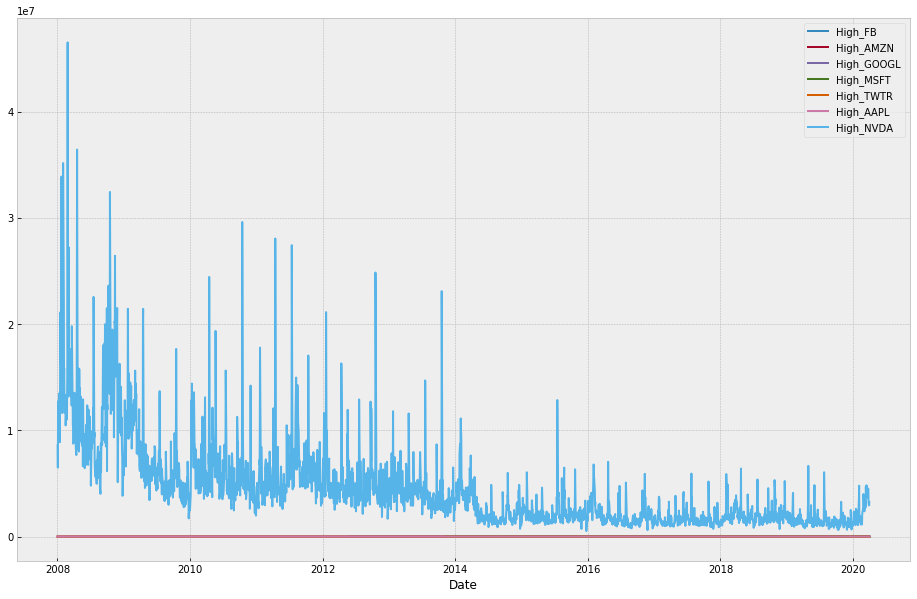

In [12]:
plt.figure(figsize=(16,10))
sns.lineplot(data = companies[['Date'] + [col for col in companies.columns if 'High' in col]].set_index('Date'), dashes=False)

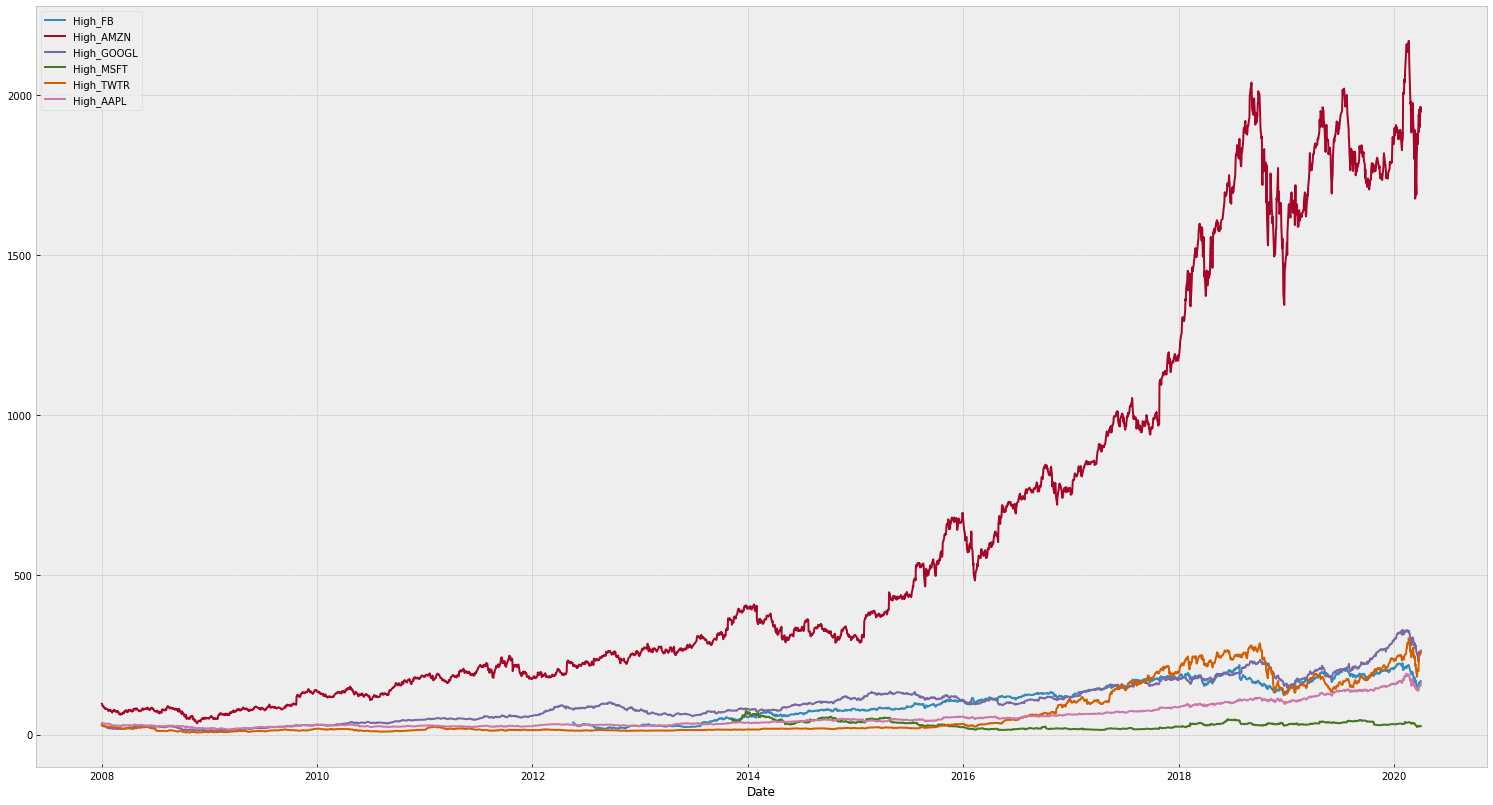

In [13]:
plt.figure(figsize=(26,14))
data_companies_line = companies[['Date'] + [col for col in companies.columns if 'High' in col]]
data_companies_line=data_companies_line.drop(['High_NVDA'], axis=1)
sns.lineplot(data = data_companies_line.set_index('Date'), dashes=False)


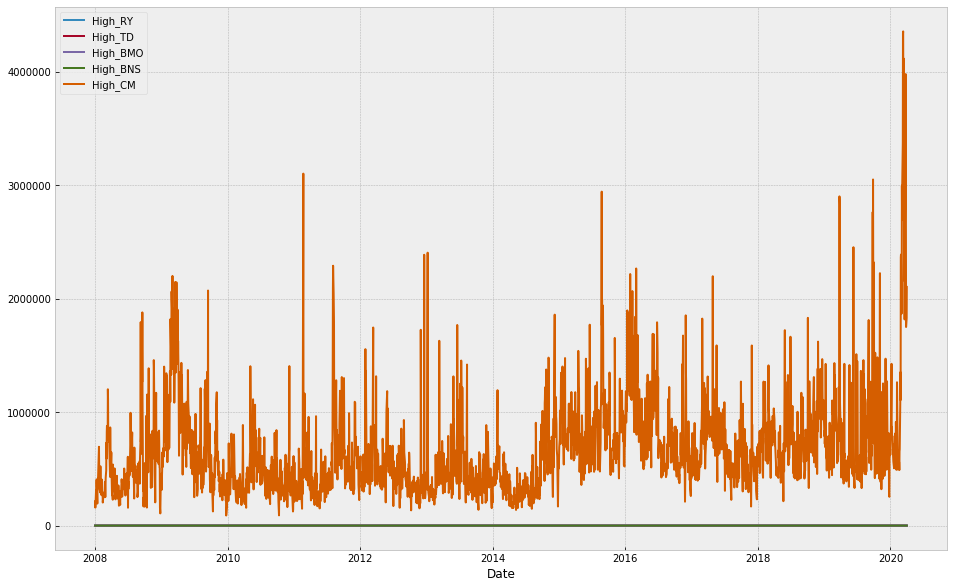

In [14]:
plt.figure(figsize=(16,10))
sns.lineplot(data = banks[['Date'] + [col for col in banks.columns if 'High' in col]].set_index('Date'), dashes=False)


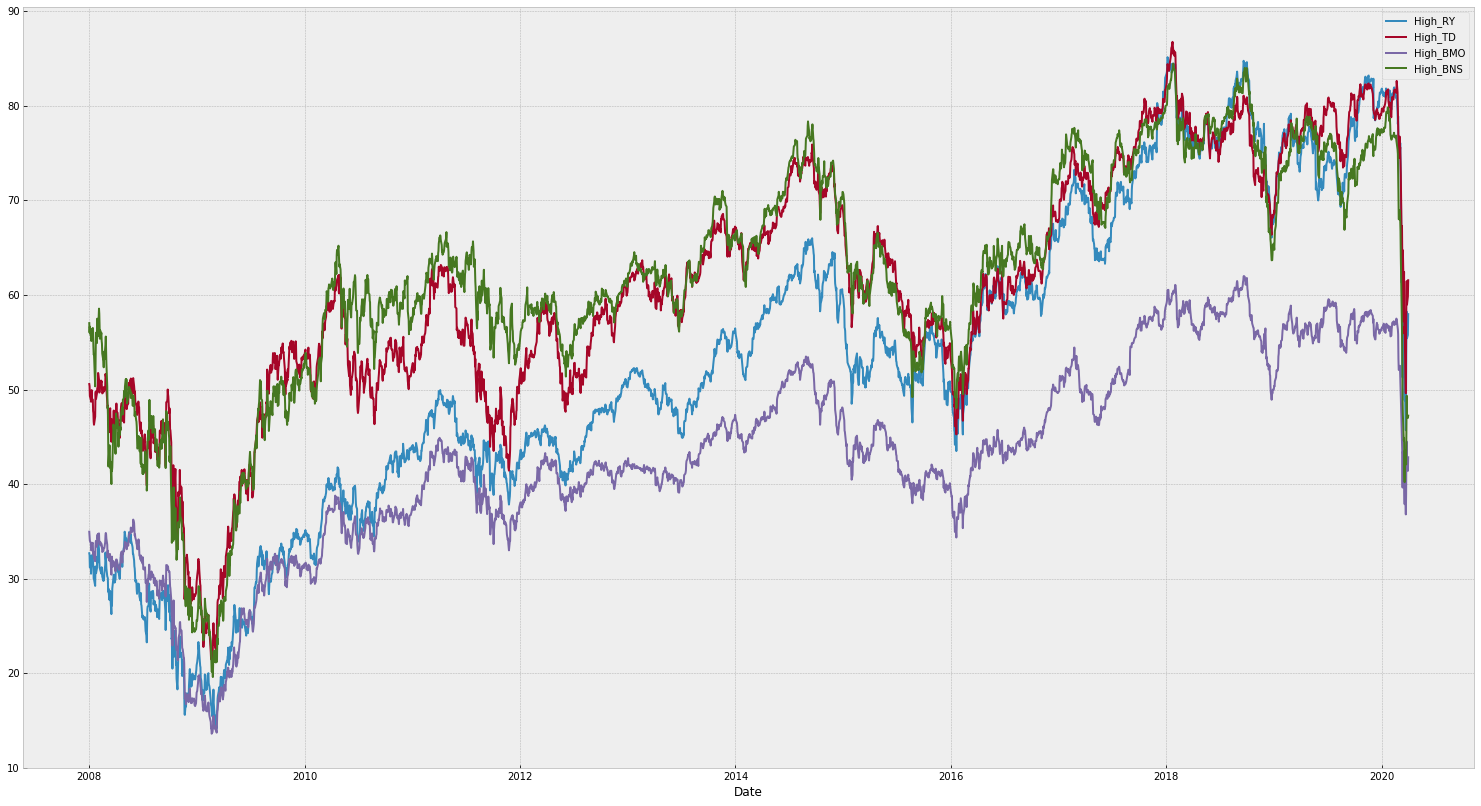

In [15]:
plt.figure(figsize=(26,14))
data_banks_line = banks[['Date'] + [col for col in banks.columns if 'High' in col]]
data_banks_line=data_banks_line.drop(['High_CM'], axis=1)
sns.lineplot(data = data_banks_line.set_index('Date'), dashes=False)


# <center>Normalizing the data</center>

In [16]:
cols = ['Open_','High_','Low_','Close_']
lis = []
def data_normalizer(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    for i in top_companies:
        for j in cols:
            df[''+str(j)+str(i)+''] = min_max_scaler.fit_transform(df[''+str(j)+str(i)+''].values.reshape(-1,1))
            lis.extend([''+str(j)+str(i)+''])
    return df[lis]


In [17]:
data = data_normalizer(companies)
del lis, cols,data_normalizer

dict_keys(['FB', 'AMZN', 'GOOGL', 'MSFT', 'TWTR', 'AAPL', 'NVDA'])

In [53]:
valid_set_size_percentage = 10 
test_set_size_percentage = 10 
#da = data[['Open_FB', 'High_FB', 'Low_FB', 'Close_FB']].to_numpy()
#def data_splitting(data, sequence):
da={}
x_train={}
y_train={}
x_valid={}
y_valid={}
x_test={}
y_test={}
for j in top_companies:
    da[str(j)] = data[['Open_'+str(j)+'','High_'+str(j)+'','Low_'+str(j)+'','Close_'+str(j)+'']].to_numpy()
    data_lis = []
    for index in range(len(da[str(j)]) - 20):
        data_lis.append(da[str(j)][index:index+20])
        #print(data_lis)
data_lis = np.array(data_lis)
valid_set_size = int(np.round(valid_set_size_percentage/100*data_lis.shape[0]));  
test_set_size = int(np.round(test_set_size_percentage/100*data_lis.shape[0]));
train_set_size = data.shape[0] - (valid_set_size + test_set_size);
print('ln')
for j in top_companies:
    x_train[str(j)] = data_lis[:train_set_size,:-1,:]
    y_train[str(j)] = data_lis[:train_set_size,-1,:]

    x_valid[str(j)] = data_lis[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid[str(j)] = data_lis[train_set_size:train_set_size+valid_set_size,-1,:]

    x_test[str(j)] = data_lis[train_set_size+valid_set_size:,:-1,:]
    y_test[str(j)] = data_lis[train_set_size+valid_set_size:,-1,:]



    

    
    #return [x_train, y_train, x_valid, y_valid, x_test, y_test]


ln


In [186]:
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]


In [187]:
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(da, 20)

AttributeError: 'DataFrame' object has no attribute 'as_matrix'